In [1]:
# tramite API si può ottenere anche il weight del game, ormai l'ho già inserito nel dataset e va bene così 
#però ricordarsi che c'è questa opzione, c'è anche num weights.

Che manca di sicuro è:
number of choices, luck.
bookkeeping è solo per una certa nicchia e non ne vale la pena perderci la testa, magari si può fare allenando un altro modello di AI o semplicemente prendendo clusters di articoli riguardanti la contabilità, clusterizzare il rulebook insieme ad essi o solo le pagine del rulebook relative alla contabilità e vedere quanto esse sono vicine a questi articoli di contabilità.
Se sono abbastanza vicine o hanno parole in comune con tfidf alto allora hanno una buona contabilità al loro interno quindi può venir calcolata così per similarità a questi articoli.

la luck dev'essere calcolata considerando dadi, carte facendo differenza tra scelte o pescaggio,
anche qua potrei prendere varie frasi di esempio dai vari rulebooks e utilizzarle per allenare un altro modello di AI che poi mi aiuti a capire quante frasi all'interno del rulebook sono relative alla randomness e  cercare di pesare il tutto correttamente.
oppure cercando pattern fissi es: lancio dadi, pescaggio carte.
rolls dice, quant'è il dado? quante carte hai da pescare? definiscono la luck
potrei approssimare a: pescare carte 1, roll dice 1, unexpected events?

technical skills è ben approssimato dai readability index

amount of choices available è molto difficile da considerare, tipo in GO la complessità è molto alta perchè le possibilità sono molto elevate.
per poter capire quante scelte fare dovrei conoscere quali sono le regole e basandomi su esse fare una specie di tree o grafo per capire quanti possibili path possono essere presi all'interno di un turno.
questo risulterebbe mooolto dispendioso, devo trovare un modo per approssimarlo oppure per evitarlo

## definition of complex
Definition of complex
1: a whole made up of complicated or interrelated parts.

2:A group of obviously related units of which the degree and nature of the relationship is imperfectly known

Sometime around 2017 it was decided not to display on a game's main page its average User Rating if the game has fewer than 30 ratings (since a small number of user ratings can be so extremely variable).

It was later decided to nonetheless show the average rating if the game had been in the database for over a year and was still struggling to get 30 ratings.



# (by BGG) Factors that affect a game's weight include:
### "Weight" is not actually defined at BGG so different people have different ideas of what it means. The choices for Game Play Weight Are:
#### Amount of rules     (contare cap sotto cap.) oppure approssimare con num sentences, visto che cap e sotto capitoli risulterebbe un po' troppo una stima al ribasso
#### Gameplay length    X
#### Amount of luck       (contare numero di elementi aleatori), I would say, more luck needed less skills is required by the players
#### Technical skill required (math, planning, reading, etc.)    X (readability index, higher the index, higher needs to be the technical skill of the player)
#### Amount of choices available (?)
#### Amount of bookkeeping (?), contabilità, (CONTARE CAPITORLI CON TOPIC = BOOKKEEPING, fare modello per trovare testi riguardo bookkeeping.)
#### Level of difficulty  (!), this feature is redundant, I need to understand the level of difficulty

# What I added to this BGG definition:
#### readability indexes also make you understand how much is actually difficult to understand the rules and game mechanics
#### avg play age
#### dependency on text while playing the game

In [110]:
#voglio un dataset del tipo: id (versione base), rulebook, weight, weight potrebbe essere estratto dalle API
#ma comunque va bene averlo già nel dataset

#siccome il weight non sembra esserci nelle API di bgg lo dovrò inserire a mano,
#dopo aver ottenuto queste caratteristiche a mano sarà possibile ottenerne altre sulla base delle BGG API
#le features da estrarre saranno la readability dal rulebook e altre features caratteristiche del game
#sarebbe utile anche capire la quantità di regole e meccanismi possibili dal rulebook

#il dataset è formato praticamente da boardgames solo su giochi di guerra, sarebbe comodo aggiungere
#giochi più fantasy

# TIP: ADD MORE GAMES, find another good feature like: number of rules by counting the numbers of chapters and sub chapters!!!!

# oppure provare con numero di componenti per giocare, tipo carte statuette ecc

## Creating Dataset

In [111]:
import pandas as pd
data = pd.read_csv('BoardGames.csv')
data # to display the first 5 lines of loaded data

,Name,Id,ruleBook
0,Gloomhaven,174430,gloomhaven-rulebook.pdf
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf
...,...,...,...
71,brass-birmingham,224517,Brass-Birmingham-Rulebook-2018.11.20-highlight...
72,7-wonders-duel,173346,6b-7-wonders-duel-rules.pdf
73,sumatra,313000,Sumatra_Rulebook-EN.pdf
74,everdell,199792,everdell_rules.pdf


### Extract xml files

In [112]:
#Python code to illustrate parsing of XML files
# importing the required modules
import csv
import requests
import xml.etree.ElementTree as ET
  
for row in data.itertuples():
    name = row[1]
    id = row[2]    
    # url of rss feed
    url = 'https://api.geekdo.com/xmlapi/boardgame/' + str(id) + '?stats=1'
  
    # creating HTTP response object from given url
    resp = requests.get(url)
    xml_file = 'xml_files/'+name+'.xml'

    with open(xml_file, 'wb') as f:
            f.write(resp.content)
    f.close()

## Insert weight

In [113]:
weights = []
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    tree = ET.parse(xml_file)
    root = tree.getroot()
    weights.append(root.findall(".//averageweight")[0].text) #xml parsing
    
data['weights'] = weights

In [114]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8806
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
71,brass-birmingham,224517,Brass-Birmingham-Rulebook-2018.11.20-highlight...,3.9115
72,7-wonders-duel,173346,6b-7-wonders-duel-rules.pdf,2.2239
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119


## import pdfs (rulebooks)

In [115]:
import PyPDF2
from tqdm import tqdm 

rulebooks = {} #for each game a rulebook

dataStrip = data[['Name', 'ruleBook']]

#extracting text from pdfile:
for row in tqdm(dataStrip.itertuples()):
    rulebook = row[2]
    name = row[1]
    elToOpen = "dataset/" + rulebook
    pdfFileObj = open(elToOpen, 'rb')
 
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    text = []
    for i in range(0, pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        text.append(pageObj.extract_text()) #text = whole rulebook
    rulebooks[name] = text
    # closing the pdf file object
    pdfFileObj.close()

print(rulebooks['Gloomhaven'])

2it [00:07,  3.07s/it]C:\Program Files\Python310\lib\site-packages\PyPDF2\_reader.py:1355: PdfReadWarning: Xref table not zero-indexed. ID numbers for objects will be corrected.
  warnings.warn(
76it [01:56,  1.54s/it]

[' STOP! If you would prefer to watch a video \nexplanation of the rules, please visit \n\nwww.cephalofair.com/gaming-rules-overview', '1\n Rule Book\n\n\n\n\n18\n\n Character Miniatures\n\n\n\n\n47\n\n Monster Stat Sheets\n\n\n\n\n24\n\n Battle Goal Cards\n\n\n\n\n50\n\n Money Tokens\n\n\n\n\n\n1\n\n Scenario Book\n\n\n\n\n17\n\n Character Boards\n\n\n\n\n\n6\n Monster Stat Sleeves\n\n\n\n\n24\n\n Personal Quest Cards\n\n\n\n\n\n46\n\n Damage Tokens\n\n\n\n\n\n1\n\n Town Records Book\n\n\n\n\n504\n\n Character Ability Cards\n\n\n\n\n\n150\n\n Event Cards\n\n\n\n\n9\n\n Random Scenario Cards\n\n\n\n\n10\n\n Scenario Aid Tokens\n\n\n\n\n\n1\n\n Map Board\n\n\n\n\n457\n\n Attack Modifier Cards\n\n\n\n\n\n253\n\n Item Cards\n\n\n\n\n40\n\n Random Dungeon Cards\n\n\n\n\n4\n\n HP/XP Dials\n\n\n\n\n\n12\n\n Objective Tokens\n\n\n\n\n\n4\n\n Player Reference Cards\n\n\n\n\n\n30\n\n 2-Sided Map Tiles\n\n\n\n\n240\n\n Monster Standees\n\n\n\n\n\n6\n\n Wood Element Discs\n\n\n\n32 \n\nSummon Tok

In [116]:
example = rulebooks['monopoly-london']

In [9]:
#weights van presi con API, almeno provarci, se no riempio il dataset a mano. perchè magari non matchano i nomi

In [10]:
#1st step:
#provare a calcolare il numero di sillabe medio, vedere se eliminare junks o cosa.

In [11]:
import spacy
from tqdm import tqdm 
from nltk.tokenize import word_tokenize
import string
import re

In [12]:
#Splits the text into sentences
def break_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    return list(doc.sents)



#Returns the number of sentences
def sentence_count(text):
    return len(break_sentences(text))

#Returns average sentence length
def avg_sentence_length(text):
    words = word_count(text)
    sentences = sentence_count(text)
    average_sentence_length = float(words / sentences)
    return average_sentence_length

def list_to_string(s):
    return ' '.join([str(elem) for elem in s])

In [13]:
sentences = break_sentences(list_to_string(example))

In [14]:
#Splits the text into words and count them
number_pattern = "^\\d+$"

def word_count(text):
    result = []
    sentences = break_sentences(text)
    count = 0
    for sentence in tqdm(sentences):
        words = word_tokenize(str(sentence))
        for token in words:
            token = str(token).strip(string.punctuation)
            #numbers do not make the text more difficult, they just bias the index to see numbers as easy words
            #I still want to keep words like hello45, maybe they refer to a specific race, mob or whatever in the Boardgame
            #numbers usually are inside tables or counting pages, not so much related to the readability.
            if str(token) not in string.punctuation and len(str(token)) != 0:
                if  re.match(number_pattern,str(token)) == None:
                    count += 1
    return count

In [15]:
#word_count(list_to_string(example))

In [16]:
#avg_sentence_length(list_to_string(example))

## Extract random sentences from rulebooks so I can use them in another dataset to train for example a model to determine how much luck there is in the rules of the rulebook
### (May take a while, use it if you dont have already the dataset of random sentences and you want a place to start)
###########################################################################################################################

In [188]:
import random

random_sentences = []
for i in tqdm(data.Name):
    s = break_sentences(list_to_string(rulebooks[i]))
    for j in range(5):
        random_s = s[random.randrange(0, len(s))]
        random_sentences.append(random_s)
        
random_sentences

  0%|                                                                                           | 0/75 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [40]:
#this method append values, if you want to extract sentences make sure the file you are working with it's empty
import openpyxl 

file = "random_sentences.xlsx"

wb = openpyxl.load_workbook(file) 
sheet = wb.active 
  

c1 = sheet.cell(row = 1, column = 1)
    # writing values to cells 
c1.value = "sample_sentence"

c2 = sheet.cell(row = 1, column = 2)
    # writing values to cells 
c2.value = "randomness"

for i in range(2, len(random_sentences)): #the senteces 0,1 are excluded, not a big deal
    c1 = sheet.cell(row = i, column = 1)
    # writing values to cells 
    try: 
        c1.value = str(random_sentences[i])
    except:
        print(random_sentences[i])
wb.save(file)

	
(4.35)	Use	the	Special	Rule	for	Tyler’s	Division;	you	may	use	
the	Third	Jackson	AM,	if	you	wish.
	(9.3)	RETURN	FIRE:	Artillery	may	fire	at	an	enemy	artillery	
unit	that	has	fired	at	it	in	that	phase,	but	only	once	per	enemy	
Activation	Phase,	regardless	how	many	times	it	is	fired	at.

(0.27)	RETREAT	BEFORE	CHARGE:	When	defending,	
mounted	cavalry	(and	Horse	artillery),	even	if	Disordered,	may	
retreat	one	or	two	hexes	before	being	Charged	by	infantry	(but	
not	mounted	cavalry).
These markers are not removed during that 

side’s Marker/Unit Removal Phase, but are instead 

resolved as usual during 
other side’s
 Combat Phase in 
the next Player Turn (0.7.3).
Card Draw
  marker can be placed 

on the current Game Turn on the Turn Track 

as a reminder that one side is drawing fewer 
cards that turn (e.g., the Soviets draw – 

card if Moscow is Axis controlled).

2.5.6

6.3.3

 When the 
Zimmermann Telegram
 is played, move the 

US Entry marker into that box.


2.3 How to Read 

############################################################################################################################

# Counting syllables

In [117]:
import pronouncing
p_list = pronouncing.phones_for_word("Randall")
pronouncing.syllable_count(p_list[0])

2

In [118]:
import string
import re



def syllables_count(word):
    p_list = pronouncing.phones_for_word(word)
    try:
        return pronouncing.syllable_count(p_list[0])
    except:
        return 0
     

def syllables_count_text(text):
    tot_syllables = 0
    sentences = break_sentences(text)
    for s in tqdm(sentences):
        words = word_tokenize(str(s))
        for w in words:
            if str(w) not in string.punctuation and len(str(w)) != 0:
                #a board games is not complex if it has many numbers, but if it has complex rules!
                if  re.match(number_pattern,str(w)) == None: #delete numbers because usually there are tables full of them or a the start of chapters
                    w = str(w).strip(string.punctuation)
                    #print(str(w), syllables_count(str(w)))
                    tot_syllables += syllables_count(str(w))
    return tot_syllables

def avg_syllables_word(text):
    return syllables_count_text(text) / word_count(text)

In [119]:
#syllables_count_text("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall")

In [120]:
#avg_syllables_word("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall")

In [121]:
# difficult words are those with syllables >= 2
# if we are counting  DaleChall, complex words are the one in not in the wordlist

In [122]:
#difficult words, not DaleChall

#Count the "complex" words consisting of three or more syllables. Do not include proper nouns,
#familiar jargon, or compound words. Do not include common suffixes (such as -es, -ed, or -ing) as a syllable;
from nltk.corpus import stopwords 
import nltk

tags_to_reduce = ['VBZ', 'VBP', 'VBN', 'VBG', 'VBD']

def difficult_words(text, threshold_syllables = 3):
     
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Find all words in the text
    count = 0
    sentences = break_sentences(text)
    for sentence in tqdm(sentences):
        s_words = word_tokenize(str(sentence))
        for w in s_words:
            if w not in string.punctuation:
                w = str(w).strip(string.punctuation)
                syllable_count = syllables_count(w)
                tag = nltk.pos_tag([w])[0][1] #take the tag, use it to not count proper nouns
                if tag in tags_to_reduce:
                    syllable_count = syllable_count - 1 # (such as -es, -ed, or -ing)
                if syllable_count >= threshold_syllables and w not in set(stopwords.words('english')) and tag != 'NNP':
                    count += 1
    return count

In [123]:
#difficult_words("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall",2)

In [124]:
#difficult_words("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall",3)

# Flesch reading ease

In [125]:
  """
        Implements Flesch Formula:
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
        Here,
          ASL = average sentence length (number of words
                divided by number of sentences)
          ASW = average word length in syllables (number of syllables
                divided by number of words)
    """
#• Scores between 90.0 and 100.0 are considered easily understandable by an average 5th grader.
#• Scores between 60.0 and 70.0 are considered easily understood by 8th and 9th graders.
#• Scores between 0.0 and 30.0 are considered easily understood by college graduates.

def flesch_reading_ease(text):
    RE = 206.835 - float(1.015 * avg_sentence_length(text)) -\
          float(84.6 * avg_syllables_word(text))
    return round(RE,2)


In [126]:
#flesch_reading_ease(list_to_string(example))

# Gunning Fog formula

In [127]:
def gunning_fog(text, difficult_words_threshold = 3):
    per_diff_words = 100 * (difficult_words(text, difficult_words_threshold) / word_count(text))
    grade = 0.4 * (avg_sentence_length(text) + per_diff_words)
    return round(grade, 2)

In [128]:
#gunning_fog(list_to_string(example), 3)

# SMOG formula

In [129]:
#SMOG FORMULA

#calculated on a sample of 30 sentences
#SMOG grading = 3 + (polysyllable count)^1/2.

'''
0-2	4th Grade	Very easy to read
3-6	5th Grade	Very easy to read
7-12	6th Grade	Easy to read
13-20	7th Grade	Fairly easy to read
21-42	8th & 9th Grade	Conversational English
43-56	10th Grade	Fairly difficult to read
57-72	11th Grade	Fairly difficult to read
73-90	12th Grade	Fairly difficult to read
91-110	College Freshman	Difficult to read
111-132	College Sophomore	Difficult to read
133-156	College Junior	Difficult to read
157-182	College Senior	Difficult to read
183-210	College Graduate	Very difficult to read
211+	Professional	Extremely difficult to read

As a general guide, it is a good idea to aim for a reading level 
equivalent to 6th to 8th graders, as this is what the average American can most easily comprehend.
Anything higher than that would be somewhat challenging to read.
'''

'\n0-2\t4th Grade\tVery easy to read\n3-6\t5th Grade\tVery easy to read\n7-12\t6th Grade\tEasy to read\n13-20\t7th Grade\tFairly easy to read\n21-42\t8th & 9th Grade\tConversational English\n43-56\t10th Grade\tFairly difficult to read\n57-72\t11th Grade\tFairly difficult to read\n73-90\t12th Grade\tFairly difficult to read\n91-110\tCollege Freshman\tDifficult to read\n111-132\tCollege Sophomore\tDifficult to read\n133-156\tCollege Junior\tDifficult to read\n157-182\tCollege Senior\tDifficult to read\n183-210\tCollege Graduate\tVery difficult to read\n211+\tProfessional\tExtremely difficult to read\n\nAs a general guide, it is a good idea to aim for a reading level \nequivalent to 6th to 8th graders, as this is what the average American can most easily comprehend.\nAnything higher than that would be somewhat challenging to read.\n'

In [130]:
import random

#taking a sample of 30 sentences
def Smog_formula(text):
    sample = []
    i = 0
    sentences = break_sentences(text)
    count = sentence_count(text)
    while i < 30:
        sample.append(sentences[random.randrange(0, count)])
        i += 1
    hard_w = difficult_words(list_to_string(sample))
    return round(3 + (hard_w **0.5),2)

In [131]:
#Smog_formula(list_to_string(example))

# Dale Chall readability score

In [132]:
DL_list = []
my_file = open('DaleChallEasyWordList.txt', 'r')
DL_list_ten = my_file.read()
DL_list_ten = list_to_string(DL_list_ten).split("\n")

for i in DL_list_ten:
    DL_list.append(i.replace(" ", ""))

DL_list

['a',
 'able',
 'aboard',
 'about',
 'above',
 'absent',
 'accept',
 'accident',
 'account',
 'ache',
 'aching',
 'acorn',
 'acre',
 'across',
 'act',
 'acts',
 'add',
 'address',
 'admire',
 'adventure',
 'afar',
 'afraid',
 'after',
 'afternoon',
 'afterward',
 'afterwards',
 'again',
 'against',
 'age',
 'aged',
 'ago',
 'agree',
 'ah',
 'ahead',
 'aid',
 'aim',
 'air',
 'airfield',
 'airplane',
 'airport',
 'airship',
 'airy',
 'alarm',
 'alike',
 'alive',
 'all',
 'alley',
 'alligator',
 'allow',
 'almost',
 'alone',
 'along',
 'aloud',
 'already',
 'also',
 'always',
 'am',
 'America',
 'American',
 'among',
 'amount',
 'an',
 'and',
 'angel',
 'anger',
 'angry',
 'animal',
 'another',
 'answer',
 'ant',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'ape',
 'apiece',
 'appear',
 'apple',
 'April',
 'apron',
 'are',
 "aren't",
 'arise',
 'arithmetic',
 'arm',
 'armful',
 'army',
 'arose',
 'around',
 'arrange',
 'arrive',
 

In [133]:
def complex_words_DL(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Find all words in the text
    count = 0
    sentences = break_sentences(text)
    for sentence in tqdm(sentences):
        s_words = word_tokenize(str(sentence))
        for w in s_words:
            if w not in DL_list:
                count += 1
    return count

In [134]:
#complex_words_DL(list_to_string(example))

In [135]:
#word_count(list_to_string(example))

In [136]:
def dale_chall_readability_score(text):
    """
        Implements Dale Challe Formula:
        Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
        Here,
            PDW = Percentage of difficult words.
            ASL = Average sentence length
            
4.9 or lower	easily understood by an average 4th-grade student or lower
5.0–5.9	easily understood by an average 5th or 6th-grade student
6.0–6.9	easily understood by an average 7th or 8th-grade student
7.0–7.9	easily understood by an average 9th or 10th-grade student
8.0–8.9	easily understood by an average 11th or 12th-grade student
9.0–9.9	easily understood by an average 13th to 15th-grade (college) student

    """
    words = word_count(text)
    if words > 0:
        # Percentage of words not on difficult word list
        
        #I should write here complex_words_DL(text)
        #but the word_list is too simple and keeps into consideration on basic words and basic forms 
        #so it's more usefull to use the function difficult_words that keeps the words to be hard with >= 3 syllables
        diff_words = (float( difficult_words(text)) / float(words)) * 100 
 
    raw_score = (0.1579 * diff_words) + \
                (0.0496 * avg_sentence_length(text))
     
    # If Percentage of Difficult Words is greater than 5 %, then;
    # Adjusted Score = Raw Score + 3.6365,
    # otherwise Adjusted Score = Raw Score
 
    if diff_words > 5:      
 
        raw_score += 3.6365
         
    return round(raw_score,2)

In [137]:
#dale_chall_readability_score(list_to_string(example))

# Powers-Sumner-Kear Readability Formula;

In [138]:
'''
RA = 0.0778(ASL) + 0.0455(NS) + 2.7971

Where,
RA = Reading Age
ASL = Average Sentence Length
NS = Number of Syllables

need to be computed on a passage of 100 words
'''
#passage of l words
def samplePassage(text, l):
    wc = word_count(text)
    result = []
    total_words = []
    sentences = break_sentences(text)
    for sentence in tqdm(sentences):
        words = word_tokenize(str(sentence))
        for token in words:
            token = str(token).strip(string.punctuation)
            if token not in string.punctuation and len(token) != 0:
                total_words.append(token)
    
    #random l words
    starting_index = random.randrange(0, wc-l)
    result = total_words[starting_index: starting_index+l] 
    return result

In [139]:
def PSK_readability(text):
    sample = list_to_string(samplePassage(text, 100))
    ASL = 100 /sentence_count(sample)
    NS = avg_syllables_word(sample) * 100
    RA = 0.0778*ASL + 0.0455*NS + 2.7971
    return round(RA, 2)

In [140]:
#PSK_readability(list_to_string(example))

# FORCAST readability formula

In [141]:
'''
Grade level = 20 − (N / 10)

Where N = number of single-syllable words in a 150-word sample
'''

'\nGrade level = 20 − (N / 10)\n\nWhere N = number of single-syllable words in a 150-word sample\n'

In [142]:
def Forcast_readability(text):
    sample = list_to_string(samplePassage(text, 150))
    complex_words = difficult_words(sample, 2)
    N = 150 - complex_words
    return round(20 - (N/10), 2)

In [143]:
#Forcast_readability(list_to_string(example))

# Use this part of code only for the newly added elements in the dataset, without computing all the features for all the elements

 #################################################################################################################

### make sure you have ran the code for the definition of the indixes and the code for the upload of the PDFs (this code is located from the start of the jupyter notebook until this specific cell)

In [146]:
#insert the name of the elements newly added to the dataset
newly_added = ['monopoly-london'] 

In [147]:
features = {}
for i in newly_added:
    feature_el = []
    feature_el.append(Forcast_readability(list_to_string(rulebooks[i])))
    feature_el.append(Smog_formula(list_to_string(rulebooks[i])))
    feature_el.append(flesch_reading_ease(list_to_string(rulebooks[i])))
    feature_el.append(PSK_readability(list_to_string(rulebooks[i])))
    feature_el.append(dale_chall_readability_score(list_to_string(rulebooks[i])))
    feature_el.append(gunning_fog(list_to_string(rulebooks[i])))
    features[i] = feature_el
  

100%|██████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 7272.94it/s]


In [148]:
for i in newly_added: #iterate on keys
    features[i].append(sentence_count(list_to_string(rulebooks[i])))

In [150]:
features

{'monopoly-london': [7.2, 7.47, 81.77, 11.52, 5.44, 8.68, 160]}

# Save the new computed features of the new elements so I can add them to the text file of the overall features (remember to manually copy and pase the features from the features_newlyAdded.txt of the new added elements to the features.txt of the overall features)

### Save features (only new adds)

In [151]:
file_newAdds = 'features_newlyAdded.txt'

import json
dict_f = features
with open(file_newAdds,"w") as file:
    file.write(json.dumps(dict_f))

############################################################################################################################

## Use this extraction code if you need to extract features from ALL the rulebooks 

## Extracting features, specifically extracting redability indixes (may take a while)

In [148]:
features = {}
for i in rulebooks: #iterate on keys
    feature_el = []
    feature_el.append(Forcast_readability(list_to_string(rulebooks[i])))
    feature_el.append(Smog_formula(list_to_string(rulebooks[i])))
    feature_el.append(flesch_reading_ease(list_to_string(rulebooks[i])))
    feature_el.append(PSK_readability(list_to_string(rulebooks[i])))
    feature_el.append(dale_chall_readability_score(list_to_string(rulebooks[i])))
    feature_el.append(gunning_fog(list_to_string(rulebooks[i])))
    features[i] = feature_el
    
features

100%|████████████████████████████████████████████████████████████████████████████| 2118/2118 [00:00<00:00, 6391.29it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1964/1964 [00:00<00:00, 6485.71it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1249/1249 [00:00<00:00, 6009.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 6720.67it/s]


100%|████████████████████████████████████████████████████████████████████████████| 2053/2053 [00:00<00:00, 6558.75it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1068/1068 [00:00<00:00, 6511.56it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1834/1834 [00:00<00:00, 5973.90it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 546/546 [00:00<00:00, 6449.34it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 655/655 [00:00<00:00, 6754.01it/s]


{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35],
 'conquerors-alexander-great': [8.1, 9.24, 76.19, 14.33, 5.7, 9.04],
 'dominant-species-card-game': [10.0, 10.21, 67.53, 9.98, 6.14, 12.06],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27],
 'barbarossa-kiev-rostov-1941': [9.7, 10.35, 68.04, 14.59, 5.95, 10.17],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69],
 'old-school-tactical-volume-1-fighting-eastern-fron': [9.0,
  7.9,
  76.82,
  17.25,
  5.48,
  8.45],
 'formula-motor-racing': [9.2, 9.0, 79.59, 17.27, 5.4, 9.03],
 'glory-iii': [9.5, 9.63, 6

### Extracting number of sentences

In [240]:
for i in tqdm(rulebooks): #iterate on keys
    features[i].append(sentence_count(list_to_string(rulebooks[i])))

In [243]:
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257],
 'conquerors-alexander-great': [8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139],
 'dominant-species-card-game': [10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536],
 'barbarossa-kiev-rostov-1941': [9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555],
 'old-school-tactical-volume-1-fighting-eastern-fron': [9.0,
  7.9,
  76.82,
  17.25,
  5.48,
  8.45,
  1198],
 'formula-moto

# Extracting amount of luck

### train the models based on a simple dataset that I created

In [155]:
import pandas as pd
data_sentences = pd.read_csv('random_sentences.csv')

In [156]:
data_sentences

,sample_sentence,randomness
0,The number is subtracted from the die roll whe...,1
1,If a different party plays the game with \ndif...,0
2,When combined with the adjective title on the ...,0
3,Dealer shuffles Battle Deck and puts it face down,1
4,"Unfortunately, the \nlight is accompanied ...",0
...,...,...
116,In games where players have the same \n \n num...,0
117,Card Adjustments: Certain event cards may modi...,1
118,5.0 The Mongols .................................,0
119,A foot missile unit may fire only at the end o...,0


In [157]:
import numpy as np
from sklearn.model_selection import train_test_split
X_init = []
for i in data_sentences.sample_sentence:
    X_init.append(i)

### Preprocessing

In [158]:
y = data_sentences.randomness

X_train_text, X_test_text, y_train, y_test = train_test_split(X_init, y, test_size=0.33)

In [159]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text+X_test_text)

X_train = tokenizer.texts_to_sequences(X_train_text)
X_test  = tokenizer.texts_to_sequences(X_test_text)

In [160]:
from keras_preprocessing.sequence import pad_sequences

max_tokens=50

X_train = pad_sequences(X_train, maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test  = pad_sequences(X_test , maxlen=max_tokens, padding="post", truncating="post", value=0)

X_train.shape, X_test.shape

((81, 50), (40, 50))

### K_means

In [162]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [163]:
import sklearn.metrics as sm

sm.accuracy_score(y_test, y_pred)

0.375

In [164]:
sm.precision_score(y_test, y_pred)

0.3333333333333333

In [165]:
sm.recall_score(y_test, y_pred)

0.25

### KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier(n_neighbors = 4)
model = knn.fit(X_train, y_train)

In [168]:
y_pred = knn.predict(X_test)

In [169]:
sm.accuracy_score(y_test, y_pred)

0.525

In [170]:
sm.precision_score(y_test, y_pred)

0.6

In [171]:
sm.recall_score(y_test, y_pred)

0.15

### Decision tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)

In [173]:
y_pred = dt.predict(X_test)

In [174]:
sm.accuracy_score(y_test, y_pred)

0.575

In [175]:
sm.precision_score(y_test, y_pred)

0.6363636363636364

In [176]:
sm.recall_score(y_test, y_pred)

0.35

[Text(0.6375, 0.9444444444444444, 'X[0] <= 77.0\ngini = 0.452\nsamples = 81\nvalue = [53, 28]'),
 Text(0.375, 0.8333333333333334, 'X[1] <= 515.5\ngini = 0.5\nsamples = 41\nvalue = [20, 21]'),
 Text(0.325, 0.7222222222222222, 'X[14] <= 214.5\ngini = 0.472\nsamples = 34\nvalue = [13, 21]'),
 Text(0.275, 0.6111111111111112, 'X[6] <= 2.0\ngini = 0.4\nsamples = 29\nvalue = [8, 21]'),
 Text(0.15, 0.5, 'X[1] <= 75.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1, 0.3888888888888889, 'X[2] <= 12.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4, 0.5, 'X[19] <= 42.0\ngini = 0.287\nsamples = 23\nvalue = [4, 19]'),
 Text(0.3, 0.3888888888888889, 'X[7] <= 2.0\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.25, 0.2777777777777778, 'gini = 0.0\nsamples

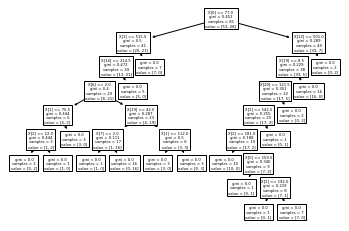

In [178]:
from sklearn import tree
tree.plot_tree(model)

### I'm more intrested in the recall since I would like to retrieve all the sentences related to randomness, recall seems ok, this should be the right path, also I might use LSTMs but I do not have many data and I would lose a lot of time extracting random sentences and label them so I will try with the decision trees, specifically with the random forest, this method it's an ensemble model that should gain more stability with the results

In [215]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(n_estimators=27)  
r = 0
p = 0
while r <= 0.56:
    rfc = RandomForestClassifier(n_estimators=27)  
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    r = sm.recall_score(y_test, y_pred)
    final_model = rfc

In [216]:
sm.recall_score(y_test, y_pred)

0.6

In [217]:
sm.precision_score(y_test, y_pred)

0.8

In [218]:
sm.accuracy_score(y_test, y_pred)

0.725

In [219]:
final_model

RandomForestClassifier(n_estimators=27)

In [220]:
y_pred, np.array(y_test)

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64))

# Save and load best RFC previously computed

In [153]:
import pickle

#### Save model
##############################################################################################################################

In [222]:
#Save model
filename = 'finalized_model_luck_prediction.sav'
pickle.dump(final_model, open(filename, 'wb'))

###############################################################################################################################

#### Load model

In [161]:
# load the model from disk
filename = 'finalized_model_luck_prediction.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.95


In [162]:
import sklearn.metrics as sm

y_pred = loaded_model.predict(X_test)
print(sm.precision_score(y_test, y_pred))
print(sm.recall_score(y_test, y_pred))

0.8888888888888888
0.8888888888888888


### The model performs good on the data that I provided, but if I try it on a rulebook, the results are not the best
### With such and high recall I obtain many false positives, while I can't do much with False negatives, I can try to filter out false positives by findind keywords inside these sentences that resemble randomness

In [163]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8806
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
71,brass-birmingham,224517,Brass-Birmingham-Rulebook-2018.11.20-highlight...,3.9115
72,7-wonders-duel,173346,6b-7-wonders-duel-rules.pdf,2.2239
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119


In [164]:
s = break_sentences(list_to_string(rulebooks['sumatra']))

In [165]:
s_converted = [str(x) for x in s]

In [166]:
max_tokens=50
X_toTrain = tokenizer.texts_to_sequences(s_converted)
X = pad_sequences(X_toTrain, maxlen=max_tokens, padding="post", truncating="post", value=0)

X.shape

(187, 50)

In [167]:
count_rnd_sentences = 0
n=0
for i in X:
    if loaded_model.predict(X[n].reshape(1,-1))[0] == 1:
        count_rnd_sentences += 1
    n+=1
    
count_rnd_sentences #how many are false positives?

89

### Randomness in boardGames is defined principally by shuffling/drawing cards, rolling dice and random events that happen while playing, or because of a particular map setup.
### I can try to reduce the number of FP by trying to filter out sentences that do not refer strictly to these events

### Since I already used an AI model to filter sentences, I can search for specific words inside the sentences to define if they are FP or FN, doing this procedure without firstly applying an AI model would mean to have too many coincidences like: die can refer to 2 different things, rolling a die or die in the game.

In [168]:
randomness_words_list = ['haphazardness', 'fickleness', 'volatility', 'changeability', 'impermanence', 'randomness', 'die', 'dice', 'shuffle','draw', 'roll']
#if there is one of these words in the sentence it means that the game is somehow
#related to cards, shuffling cards, or rolling dice, and that's the main components of luck in boardgames

In [169]:
#lemmatization (find root of words)
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [170]:
def check_against_randomness_list(sentence):
    for i in sentence:
        if lemmatizer.lemmatize(str(i)) in randomness_words_list: #search the lemma if it's inside the randomness word list
            return 1 #related to randomness (hopefully)
    return 0 #not related to randomness (hopefully)

In [181]:
def from_vector_to_sentence(embedding):
    word_index_keys = [x for x in tokenizer.word_index]
    result = []
    for x in embedding:
        if x != 0:
            result.append(word_index_keys[x - 1])
    return result

In [183]:
#try again now with the lemmatization control
def count_randomness_sentences(rulebook):
    #curious = []
    s = break_sentences(rulebook)
    s_converted = [str(x) for x in s]
    max_tokens=50
    X_toTrain = tokenizer.texts_to_sequences(s_converted)
    X = pad_sequences(X_toTrain, maxlen=max_tokens, padding="post", truncating="post", value=0)
 
    count_rnd_sentences = 0
    n=0
    for i in X:
        if loaded_model.predict(X[n].reshape(1,-1))[0] == 1: #if the AI model thinks that the sentence can be related to randomness
            sentence = from_vector_to_sentence(i) #re-build the sentence
            if check_against_randomness_list(sentence): #check manually if the root of words of the sentece are inside the randomness list
                #curious.append(sentence)
                count_rnd_sentences += 1
        n+=1
    
    return count_rnd_sentences #, curious

In [185]:
count_randomness_sentences(list_to_string(rulebooks['monopoly-london']))

12

In [186]:
#extract single feature
name = 'monopoly-london'
round(count_randomness_sentences(list_to_string(rulebooks[name]))/ sentence_count(list_to_string(rulebooks[name])),2)

0.07

# Extract luck from rulebooks

### I can define luck as the number of defined sentences that cointain randomness / total number of sentences of the rulebook, otherwise big rulebooks will have for sure an higher luck coefficient, and maybe they just have many examples and the real luck present in the game does not actually increases

In [246]:
for name in tqdm(rulebooks):
    features[name].append(round(count_randomness_sentences(list_to_string(rulebooks[name]))/ sentence_count(list_to_string(rulebooks[name])),2))

100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [10:49<00:00,  8.67s/it]


In [235]:
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1506],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1192],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 279],
 'conquerors-alexander-great': [8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1361],
 'dominant-species-card-game': [10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 952],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1691],
 'barbarossa-kiev-rostov-1941': [9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 2118],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2298],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  1051],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 633],
 'old-school-tactical-volume-1-fighting-eastern-fron': [9.0,
  7.9,
  76.82,
  17.25,
  5.48,
  8.45,
  1460],
 'formula-mot

# Bookkeeping
### I will try to use once again, simple tecniques in order to find similar parts of text that are related with bookkeeping, deep neural nets are an option, but not with the amount of data that I need to extract/use.
### I  can try to find articles about bookkeeping, transform them into vectors using an embedder, do the same for the rulebooks, and then try compute the avg. of similiraty between the rulebook and the articles about bookkeeping. Embedders are used to find similar semantic in text, in this case the similarity will probably be very low, but maybe I see an higher similarity in games which have some mechanics related to bookkeeping

# AL POSTO DI UTILIZZARE TUTTO IL TESTO, FORSE DOVREI UTILIZZARE LE PAROLE PIù FREQUENTI? TFIDF? BOH
# E se invece considerassi la similarità degli altri games rispetto a monopoly? 
# perchè monopoly è la definizione di bookkeeping as a boardgame, quindi perchè no? 

In [265]:
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [266]:
import os

corpus = []
for article in [(x[0], x[2]) for x in os.walk('bookkeping_articles/')][0][1]:
    with open('bookkeping_articles/' + article ) as f:
        lines = f.readlines()
        text = list_to_string(lines)
        corpus.append(text)

In [267]:
processed_corpus = preprocess_documents(corpus)
tagged_corpus = [TaggedDocument(d, [i]) for i, d in enumerate(processed_corpus)]

In [268]:
'''
dm = 0 means the PV-DBOW architecture will be used,
vector_size = 200 means that the feature vectors will have 200 entries,
window = 2 is the maximum distance between the current and predicted word,
hs = 1 means that hierarchical softmax will be used for model training.
'''

embedder = Doc2Vec(tagged_corpus, dm=0, vector_size=200, window=2, min_count=1, epochs=10, hs=1) #embedder

In [273]:
new_doc = gensim.parsing.preprocessing.preprocess_string(list_to_string(rulebooks['sumatra']))
test_doc_vector = embedder.infer_vector(new_doc)
sims = embedder.docvecs.most_similar(positive = [test_doc_vector])

sims

C:\Users\fiori\AppData\Local\Temp\ipykernel_2016\3740916134.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = embedder.docvecs.most_similar(positive = [test_doc_vector])


[(3, 0.9197444915771484),
 (1, 0.7062914967536926),
 (4, 0.6420300602912903),
 (5, 0.5488938689231873),
 (0, 0.5212000608444214),
 (2, 0.5050145387649536)]

# aumentare articoli di bookkeeping, e determinare valore per il quale al di sopra è presente una certa componente di bookkeeping e al di sotto invece poco o niente, se non funziona provare un altro embedder o magari tfidf oppure provare a fare similarity con monopoly e utilizzare quella come bookkeeping! easy

In [274]:
values = [x[1] for x in sims]

avg = sum(values) / len(values)
avg

0.640529086192449

# Save features (all elements)

In [189]:
file_f = 'features.txt'

import json
dict_f = features
with open(file_f,"w") as file:
    file.write(json.dumps(dict_f))

# Upload (all the features from all the computed elements)
### if you have computed features for new elements make sure to put them in the right .txt file so they can be used along with the other elements (manually copy and paste)

In [198]:
file_f = 'features.txt'

import json
#reading the json file
with open(file_f, "r") as file:
    file_content = file.read()
    
features = json.loads(file_content)
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 0.01],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063.0,
  0.02],
 'commands-colors-ancients': [9.0,
  10.94,
  60.67,
  12.29,
  6.13,
  12.35,
  257.0,
  0.02],
 'conquerors-alexander-great': [8.1,
  9.24,
  76.19,
  14.33,
  5.7,
  9.04,
  1139.0,
  0.06],
 'dominant-species-card-game': [10.0,
  10.21,
  67.53,
  9.98,
  6.14,
  12.06,
  188.0,
  0.04],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 0.07],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536.0,
  0.03],
 'barbarossa-kiev-rostov-1941': [9.7,
  10.35,
  68.04,
  14.59,
  5.95,
  10.17,
  1937.0,
  0.01],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 0.02],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899.0,
  0.03],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.

# THE FOLLOWING FEATURES ARE EXTRACTED FROM THE XML FILES AND THUS FAST TO COMPUTE

# Extracting average age for playinng the game

In [199]:
def avg_voted_age(xml_file, threshold_min_voting_numbers= 5):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    res = 0
    div = 0
    for item in root.findall(".//poll[@name='suggested_playerage']//result"): #xml parsing
        if item.attrib['value'] == '21 and up':
            res += 21 * int(item.attrib['numvotes'])
            div += int(item.attrib['numvotes'])
        else:
            res += int(item.attrib['value']) * int(item.attrib['numvotes'])
            div += int(item.attrib['numvotes'])
    if div > threshold_min_voting_numbers:
        return round(res/div,2)
    return root.findall(".//age")[0].text #default value

In [200]:
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(avg_voted_age(xml_file))
    print(features[name])

#first 6 numbers are based on the readability indexes, the last number is the avg age to play the game according to users

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 0.01, 12.74]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 0.02, '12']
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 0.02, 11.0]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 0.06, '12']
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 0.04, 8.75]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 0.07, '12']
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 0.03, '14']
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 0.01, 15.33]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 0.02, 15.72]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 0.03, 14.46]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 0.03, 12.75]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 0.02, '0']
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 0.12, 8.0]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 0.02, '12']
[9.1, 9.56, 70.72, 12.5, 5.83, 9.91, 1324.0, 0.03, '12']
[8.3, 10.75, 72.61, 12.39, 6.16, 10.62, 1628.0, 0.03, 13.0]
[9.2, 11.06, 70.1, 13.63, 6.21, 11.92, 1482.0, 0.03, 14.89]
[9.3, 9

# Extratring dependecy on text when playing the game
### basically means: do you really need to read the cards and the text?

In [201]:
'''
example:
<result level="1" value="No necessary in-game text" numvotes="1"/>
<result level="2" value="Some necessary text - easily memorized or small crib sheet" numvotes="0"/>
<result level="3" value="Moderate in-game text - needs crib sheet or paste ups" numvotes="2"/>
<result level="4" value="Extensive use of text - massive conversion needed to be playable" numvotes="43"/>
<result level="5" value="Unplayable in another language" numvotes="16"/>
'''

'\nexample:\n<result level="1" value="No necessary in-game text" numvotes="1"/>\n<result level="2" value="Some necessary text - easily memorized or small crib sheet" numvotes="0"/>\n<result level="3" value="Moderate in-game text - needs crib sheet or paste ups" numvotes="2"/>\n<result level="4" value="Extensive use of text - massive conversion needed to be playable" numvotes="43"/>\n<result level="5" value="Unplayable in another language" numvotes="16"/>\n'

In [202]:
def dependency_on_language(xml_file): #from 1 to 5
    tree = ET.parse(xml_file)
    root = tree.getroot()
    res = 0
    div = 0
    for item in root.findall(".//poll[@name='language_dependence']//result"):
        res += int(item.attrib['level']) * int(item.attrib['numvotes'])
        div += int(item.attrib['numvotes'])
    
    if div > 1: #num_votes > min threshold
        return round(res/div,2) #weighted level from 1 to 5, 5 means unplayable in another language, 1 means no dependency on text
    return res #default value, in the middle of the scale.

In [203]:
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(dependency_on_language(xml_file))
    print(features[name])
    
#first 6 = read index, last 2 = age, dependency on text

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 0.01, 12.74, 4.18]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 0.02, '12', 3.0]
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 0.02, 11.0, 3.08]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 0.06, '12', 3]
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 0.04, 8.75, 2.12]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 0.07, '12', 2.5]
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 0.03, '14', 4.0]
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 0.01, 15.33, 3.67]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 0.02, 15.72, 4.0]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 0.03, 14.46, 2.69]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 0.03, 12.75, 3.22]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 0.02, '0', 3]
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 0.12, 8.0, 2.22]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 0.02, '12', 2]
[9.1, 9.56, 70.72, 12.5, 5.83, 9.91, 1324.0, 0.03, '12', 2.8]
[8.3, 10.75, 72.61, 12.39, 6.16, 10.62, 1628.0, 0.0

# Extracting playtime (usually the longer the time the harder the game, 20 minutes play games do not have many rules!)

In [204]:
def playtime(xml_file): 
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return float(root.findall(".//playingtime")[0].text)
    

In [205]:
#ADD playtime to features

for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(playtime(xml_file))
    print(features[name])

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 0.01, 12.74, 4.18, 120.0]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 0.02, '12', 3.0, 240.0]
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 0.02, 11.0, 3.08, 60.0]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 0.06, '12', 3, 240.0]
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 0.04, 8.75, 2.12, 60.0]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 0.07, '12', 2.5, 90.0]
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 0.03, '14', 4.0, 240.0]
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 0.01, 15.33, 3.67, 240.0]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 0.02, 15.72, 4.0, 360.0]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 0.03, 14.46, 2.69, 720.0]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 0.03, 12.75, 3.22, 90.0]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 0.02, '0', 3, 60.0]
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 0.12, 8.0, 2.22, 20.0]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 0.02, '12', 2, 240.0]
[9.1, 9.56, 70.72, 12

In [206]:
features['sumatra']

[9.2, 11.06, 64.01, 11.68, 6.37, 12.1, 187.0, 0.0, '8', 1, 45.0]

# IMPORTANTE!
# PROVARE 
# A 
# SCALARE
# LE
# FEATURES
# METTENDOLE 
# IN 
# RANGE 
# 0 - 1
# DOVREBBE ESSERE MEGLIO PER IL MODELLO
# SENZA SBILANCIARSI SU UNA O SULL'ALTRA FEATURE!!

# Creating dataset for computing the best model for weight prediction

In [207]:
import numpy as np
from sklearn.model_selection import train_test_split
X = []
for name in data.Name:
    X.append(features[name])

In [208]:
float(data.loc[data['Name'] == 'sumatra'].weights)

1.875

In [209]:
y = data.weights

In [210]:
mat = X
        
#convert everything to float
for i in range(0,len(mat)):
    for j in range(0,len(mat[i])):
        mat[i][j] = float(mat[i][j])

In [211]:
X = np.array(X)
y = np.array(y)
X,y

(array([[1.090e+01, 9.630e+00, 6.802e+01, 1.333e+01, 6.140e+00, 1.114e+01,
         1.384e+03, 1.000e-02, 1.274e+01, 4.180e+00, 1.200e+02],
        [1.070e+01, 1.100e+01, 6.141e+01, 1.672e+01, 6.490e+00, 1.127e+01,
         1.063e+03, 2.000e-02, 1.200e+01, 3.000e+00, 2.400e+02],
        [9.000e+00, 1.094e+01, 6.067e+01, 1.229e+01, 6.130e+00, 1.235e+01,
         2.570e+02, 2.000e-02, 1.100e+01, 3.080e+00, 6.000e+01],
        [8.100e+00, 9.240e+00, 7.619e+01, 1.433e+01, 5.700e+00, 9.040e+00,
         1.139e+03, 6.000e-02, 1.200e+01, 3.000e+00, 2.400e+02],
        [1.000e+01, 1.021e+01, 6.753e+01, 9.980e+00, 6.140e+00, 1.206e+01,
         1.880e+02, 4.000e-02, 8.750e+00, 2.120e+00, 6.000e+01],
        [9.900e+00, 7.900e+00, 7.595e+01, 1.050e+01, 5.390e+00, 7.960e+00,
         8.280e+02, 7.000e-02, 1.200e+01, 2.500e+00, 9.000e+01],
        [7.800e+00, 8.480e+00, 8.204e+01, 1.361e+01, 5.710e+00, 9.270e+00,
         1.536e+03, 3.000e-02, 1.400e+01, 4.000e+00, 2.400e+02],
        [9.700e+00, 

In [212]:
X.shape,y.shape

((76, 11), (76,))

# I want to predict the right weight, this is a regression task

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [214]:
X_train

array([[9.900e+00, 9.560e+00, 7.754e+01, 1.022e+01, 5.940e+00, 9.570e+00,
        8.030e+02, 4.000e-02, 1.516e+01, 4.010e+00, 1.800e+02],
       [9.700e+00, 1.035e+01, 6.804e+01, 1.459e+01, 5.950e+00, 1.017e+01,
        1.937e+03, 1.000e-02, 1.533e+01, 3.670e+00, 2.400e+02],
       [9.800e+00, 8.390e+00, 7.484e+01, 1.052e+01, 5.840e+00, 8.740e+00,
        7.160e+02, 3.000e-02, 1.450e+01, 3.470e+00, 1.800e+02],
       [1.050e+01, 1.131e+01, 7.127e+01, 1.724e+01, 6.010e+00, 1.145e+01,
        1.095e+03, 4.000e-02, 0.000e+00, 2.000e+00, 2.100e+02],
       [8.700e+00, 9.480e+00, 7.322e+01, 1.066e+01, 5.900e+00, 9.970e+00,
        2.680e+02, 1.000e-02, 9.910e+00, 1.090e+00, 3.000e+01],
       [1.010e+01, 9.710e+00, 7.075e+01, 1.149e+01, 5.970e+00, 9.820e+00,
        1.377e+03, 1.000e-02, 1.200e+01, 3.000e+00, 1.800e+02],
       [7.200e+00, 7.470e+00, 8.177e+01, 1.152e+01, 5.440e+00, 8.680e+00,
        1.600e+02, 7.000e-02, 8.000e+00, 0.000e+00, 1.800e+02],
       [9.100e+00, 8.570e+00, 7.19

In [215]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [216]:
y_pred = model.predict(X_test)
y_pred

array([2.65141409, 2.90392531, 3.0675296 , 3.67784168, 2.77325227,
       3.16401175, 2.75164551, 2.75854565, 2.5433606 , 2.10239035,
       3.76535098, 3.02974441, 3.67785659, 2.89603547, 2.81839018,
       2.98908485, 3.33137164, 2.81542126, 3.17155422, 3.19399489,
       4.17790808, 2.83998169, 3.89993678, 3.89798441, 3.32918174,
       3.34291027])

In [217]:
y_test

array(['1.9059', '2.7429', '2.5846', '3.8806', '2.7826', '3.0556',
       '3.2516', '3.1429', '2.5152', '2.9038', '3.7447', '3.7073',
       '3.7826', '1.1762', '3.5517', '2.11', '3.7733', '2.1622', '2.4074',
       '3.7179', '3.3878', '2.0169', '3.6071', '3.8611', '3.5333',
       '3.3206'], dtype=object)

In [218]:
print("r2: %.3f" % model.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.289
The mean squared error (MSE) on test set: 0.3676


# Gradient boosting

In [219]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

# Print Coefficient of determination R^2
print("r2: %.3f" % gbr.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.566
The mean squared error (MSE) on test set: 0.2244


In [220]:
#Gradient boosting performs better than L.R. but there are still many errors, the predicted results are all around 3.
#possible problems: 
#1. features are not so good
#2. I do not have enought data

# Regression tree

In [221]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [222]:
y_pred = regressor.predict(X_test)

In [223]:
# Print Coefficient of determination R^2
print("r2: %.3f" % regressor.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.511
The mean squared error (MSE) on test set: 0.2531


In [224]:
y_pred

array([3.1316, 3.4293, 2.7   , 3.2167, 3.4878, 2.75  , 3.125 , 3.    ,
       2.3652, 2.3652, 3.1321, 3.4293, 3.6271, 1.6103, 2.7568, 2.3652,
       3.39  , 1.7826, 3.125 , 3.4878, 3.1321, 2.3652, 3.1321, 4.08  ,
       2.8125, 3.4293])

In [225]:
y_test

array(['1.9059', '2.7429', '2.5846', '3.8806', '2.7826', '3.0556',
       '3.2516', '3.1429', '2.5152', '2.9038', '3.7447', '3.7073',
       '3.7826', '1.1762', '3.5517', '2.11', '3.7733', '2.1622', '2.4074',
       '3.7179', '3.3878', '2.0169', '3.6071', '3.8611', '3.5333',
       '3.3206'], dtype=object)

In [226]:
X_train_less_features = []
X_test_less_features = []
for i in X_train:
    X_train_less_features.append(i[5:])
    
for i in X_test:
    X_test_less_features.append(i[5:])

In [227]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train_less_features, y_train)

DecisionTreeRegressor(random_state=0)

In [228]:
y_pred = regressor.predict(X_test_less_features)

In [229]:
# Print Coefficient of determination R^2
print("r2:  %.3f" % regressor.score(X_test_less_features, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, regressor.predict(X_test_less_features))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2:  0.267
The mean squared error (MSE) on test set: 0.3789


In [230]:
gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_less_features, y_train)

# Print Coefficient of determination R^2
print("r2: %.3f" % gbr.score(X_test_less_features, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_less_features))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.581
The mean squared error (MSE) on test set: 0.2169


In [231]:
gbr.predict(X_test_less_features)

array([2.31943519, 3.51970902, 3.63080495, 3.33768911, 3.12130848,
       3.03684987, 3.45930446, 2.82114498, 2.26918171, 2.93297709,
       3.54978741, 3.39957788, 3.42033152, 1.59075066, 2.99626492,
       2.56163651, 3.40873586, 2.61467867, 2.80831684, 3.07390316,
       3.32888146, 2.86025318, 3.08293103, 4.14776081, 3.07330383,
       3.40337559])

In [232]:
y_test

array(['1.9059', '2.7429', '2.5846', '3.8806', '2.7826', '3.0556',
       '3.2516', '3.1429', '2.5152', '2.9038', '3.7447', '3.7073',
       '3.7826', '1.1762', '3.5517', '2.11', '3.7733', '2.1622', '2.4074',
       '3.7179', '3.3878', '2.0169', '3.6071', '3.8611', '3.5333',
       '3.3206'], dtype=object)

In [233]:
#I risultati sono migliori!!

# I need to understand which is the beast feature/features to use 

#### PCA

In [234]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.33, random_state=42)

In [236]:
gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.336
The mean squared error (MSE) on test set: 0.3432


## since Gradient-boosting seems the best model to get, try all the possible combinations of features on GB

In [237]:
#X = array of features
def try_all_features(X, y, features_to_select):
    if( max(features_to_select) > len(X[0])-1):
        print("error, the vector X only has: "+ str(len(X[0])-1) + "features")
        return
    
    X_try = []
    for i in X:
        el = []
        for j in features_to_select:
            el.append(i[j])
        X_try.append(el)
    
    X_try = np.array(X_try)
    try:
        X_try.shape[1]
    except:
        X_try = X_try.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_try, y, test_size=0.33, random_state=42)

    #print(X_try)
    
    #Gradient boosting, #400-500 estimators
    gbr_params = {'n_estimators': 400, #400
          'max_depth': 8, #8
          'min_samples_split': 2, #2
          'learning_rate': 0.01, #0.01
          'loss': 'squared_error'}


    # Create an instance of gradient boosting regressor
    gbr = GradientBoostingRegressor(**gbr_params)

    # Fit the model
    gbr.fit(X_train, y_train)
    
    print("Features selected:", features_to_select)
    # Print Coefficient of determination R^2
    r2 = gbr.score(X_test, y_test)
    print("R^2 on test set: %.3f" % r2)
    # Create the mean squared error
    mse = mean_squared_error(y_test, gbr.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("\n")
    return r2, mse, gbr.predict(X_test), gbr

In [238]:
try_all_features(X, y, (0,1,2,3,4,5,6,7,8))

Features selected: (0, 1, 2, 3, 4, 5, 6, 7, 8)
R^2 on test set: 0.326
The mean squared error (MSE) on test set: 0.3487




(0.325626041860523,
 0.34873149543955795,
 array([1.82814432, 3.36091668, 3.12713947, 2.70266874, 3.45670403,
        2.82762964, 3.06562188, 2.96227408, 1.7277333 , 2.14738374,
        3.5270332 , 3.3869482 , 3.43805465, 1.71443927, 2.96410717,
        2.83989355, 2.92974157, 3.01442762, 2.91531328, 3.0035539 ,
        3.34700355, 3.01757354, 3.34757431, 3.99655027, 2.83164512,
        3.23296623]),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=400))

# try on all possible features combinatios
#### Take into consideration time, if we have lots of features this process is unfeasible, in that case you'll need to select what you think are the best features and try them against the dataset and see which combination obtain the best error.
#### In this case all the combinations are bruteforced!

In [239]:
from itertools import combinations
features_to_select = [i for i in range(len(X[0]))]
list_combinations = list()
for n in range(len(features_to_select) + 1):
    list_combinations += list(combinations(features_to_select, n))

In [240]:
max_r2 = 0
max_r2_combination = ()
min_mse = 1
min_mse_combination = ()
best_r2_predictions = []
best_mse_predictions = []
best_model_mse = GradientBoostingRegressor()
best_model_r2 = GradientBoostingRegressor()
for combination in list_combinations[1:]:
    r2, mse, predictions, model= try_all_features(X, y, combination)
    if r2 > max_r2:
        max_r2 = r2
        max_r2_combination = combination
        best_r2_predictions = predictions
        best_model_mse = model
    if mse < min_mse:
        min_mse = mse
        min_mse_combination = combination
        best_mse_predictions = predictions
        best_model_r2 = model

Features selected: (0,)
R^2 on test set: -0.359
The mean squared error (MSE) on test set: 0.7028


Features selected: (1,)
R^2 on test set: -1.261
The mean squared error (MSE) on test set: 1.1693


Features selected: (2,)
R^2 on test set: -0.403
The mean squared error (MSE) on test set: 0.7253


Features selected: (3,)
R^2 on test set: -0.790
The mean squared error (MSE) on test set: 0.9257


Features selected: (4,)
R^2 on test set: -0.365
The mean squared error (MSE) on test set: 0.7058


Features selected: (5,)
R^2 on test set: -0.486
The mean squared error (MSE) on test set: 0.7684


Features selected: (6,)
R^2 on test set: 0.088
The mean squared error (MSE) on test set: 0.4714


Features selected: (7,)
R^2 on test set: 0.236
The mean squared error (MSE) on test set: 0.3952


Features selected: (8,)
R^2 on test set: 0.453
The mean squared error (MSE) on test set: 0.2827


Features selected: (9,)
R^2 on test set: -0.003
The mean squared error (MSE) on test set: 0.5188


Features sele

Features selected: (0, 3, 4)
R^2 on test set: -0.495
The mean squared error (MSE) on test set: 0.7733


Features selected: (0, 3, 5)
R^2 on test set: -0.627
The mean squared error (MSE) on test set: 0.8416


Features selected: (0, 3, 6)
R^2 on test set: 0.075
The mean squared error (MSE) on test set: 0.4783


Features selected: (0, 3, 7)
R^2 on test set: -0.461
The mean squared error (MSE) on test set: 0.7557


Features selected: (0, 3, 8)
R^2 on test set: 0.193
The mean squared error (MSE) on test set: 0.4173


Features selected: (0, 3, 9)
R^2 on test set: -0.025
The mean squared error (MSE) on test set: 0.5302


Features selected: (0, 3, 10)
R^2 on test set: 0.520
The mean squared error (MSE) on test set: 0.2484


Features selected: (0, 4, 5)
R^2 on test set: -0.131
The mean squared error (MSE) on test set: 0.5848


Features selected: (0, 4, 6)
R^2 on test set: 0.079
The mean squared error (MSE) on test set: 0.4760


Features selected: (0, 4, 7)
R^2 on test set: -0.137
The mean squar

Features selected: (2, 5, 10)
R^2 on test set: 0.429
The mean squared error (MSE) on test set: 0.2952


Features selected: (2, 6, 7)
R^2 on test set: 0.360
The mean squared error (MSE) on test set: 0.3312


Features selected: (2, 6, 8)
R^2 on test set: 0.234
The mean squared error (MSE) on test set: 0.3959


Features selected: (2, 6, 9)
R^2 on test set: 0.325
The mean squared error (MSE) on test set: 0.3491


Features selected: (2, 6, 10)
R^2 on test set: 0.313
The mean squared error (MSE) on test set: 0.3555


Features selected: (2, 7, 8)
R^2 on test set: 0.301
The mean squared error (MSE) on test set: 0.3614


Features selected: (2, 7, 9)
R^2 on test set: -0.283
The mean squared error (MSE) on test set: 0.6637


Features selected: (2, 7, 10)
R^2 on test set: 0.264
The mean squared error (MSE) on test set: 0.3808


Features selected: (2, 8, 9)
R^2 on test set: 0.325
The mean squared error (MSE) on test set: 0.3492


Features selected: (2, 8, 10)
R^2 on test set: 0.401
The mean squared

Features selected: (0, 1, 3, 10)
R^2 on test set: 0.287
The mean squared error (MSE) on test set: 0.3686


Features selected: (0, 1, 4, 5)
R^2 on test set: -0.247
The mean squared error (MSE) on test set: 0.6446


Features selected: (0, 1, 4, 6)
R^2 on test set: 0.150
The mean squared error (MSE) on test set: 0.4393


Features selected: (0, 1, 4, 7)
R^2 on test set: 0.003
The mean squared error (MSE) on test set: 0.5155


Features selected: (0, 1, 4, 8)
R^2 on test set: 0.392
The mean squared error (MSE) on test set: 0.3143


Features selected: (0, 1, 4, 9)
R^2 on test set: -0.056
The mean squared error (MSE) on test set: 0.5462


Features selected: (0, 1, 4, 10)
R^2 on test set: 0.304
The mean squared error (MSE) on test set: 0.3601


Features selected: (0, 1, 5, 6)
R^2 on test set: 0.212
The mean squared error (MSE) on test set: 0.4076


Features selected: (0, 1, 5, 7)
R^2 on test set: -0.449
The mean squared error (MSE) on test set: 0.7495


Features selected: (0, 1, 5, 8)
R^2 on te

Features selected: (0, 4, 6, 9)
R^2 on test set: 0.023
The mean squared error (MSE) on test set: 0.5054


Features selected: (0, 4, 6, 10)
R^2 on test set: 0.370
The mean squared error (MSE) on test set: 0.3257


Features selected: (0, 4, 7, 8)
R^2 on test set: 0.351
The mean squared error (MSE) on test set: 0.3356


Features selected: (0, 4, 7, 9)
R^2 on test set: -0.339
The mean squared error (MSE) on test set: 0.6924


Features selected: (0, 4, 7, 10)
R^2 on test set: 0.211
The mean squared error (MSE) on test set: 0.4081


Features selected: (0, 4, 8, 9)
R^2 on test set: 0.391
The mean squared error (MSE) on test set: 0.3148


Features selected: (0, 4, 8, 10)
R^2 on test set: 0.342
The mean squared error (MSE) on test set: 0.3405


Features selected: (0, 4, 9, 10)
R^2 on test set: 0.262
The mean squared error (MSE) on test set: 0.3816


Features selected: (0, 5, 6, 7)
R^2 on test set: 0.191
The mean squared error (MSE) on test set: 0.4184


Features selected: (0, 5, 6, 8)
R^2 on te

Features selected: (1, 4, 5, 7)
R^2 on test set: 0.096
The mean squared error (MSE) on test set: 0.4672


Features selected: (1, 4, 5, 8)
R^2 on test set: 0.282
The mean squared error (MSE) on test set: 0.3715


Features selected: (1, 4, 5, 9)
R^2 on test set: -0.194
The mean squared error (MSE) on test set: 0.6175


Features selected: (1, 4, 5, 10)
R^2 on test set: 0.285
The mean squared error (MSE) on test set: 0.3697


Features selected: (1, 4, 6, 7)
R^2 on test set: -0.109
The mean squared error (MSE) on test set: 0.5737


Features selected: (1, 4, 6, 8)
R^2 on test set: 0.282
The mean squared error (MSE) on test set: 0.3712


Features selected: (1, 4, 6, 9)
R^2 on test set: 0.246
The mean squared error (MSE) on test set: 0.3900


Features selected: (1, 4, 6, 10)
R^2 on test set: 0.399
The mean squared error (MSE) on test set: 0.3108


Features selected: (1, 4, 7, 8)
R^2 on test set: 0.367
The mean squared error (MSE) on test set: 0.3272


Features selected: (1, 4, 7, 9)
R^2 on tes

Features selected: (2, 5, 8, 10)
R^2 on test set: 0.188
The mean squared error (MSE) on test set: 0.4196


Features selected: (2, 5, 9, 10)
R^2 on test set: 0.367
The mean squared error (MSE) on test set: 0.3274


Features selected: (2, 6, 7, 8)
R^2 on test set: -0.121
The mean squared error (MSE) on test set: 0.5796


Features selected: (2, 6, 7, 9)
R^2 on test set: 0.303
The mean squared error (MSE) on test set: 0.3606


Features selected: (2, 6, 7, 10)
R^2 on test set: 0.422
The mean squared error (MSE) on test set: 0.2988


Features selected: (2, 6, 8, 9)
R^2 on test set: 0.292
The mean squared error (MSE) on test set: 0.3660


Features selected: (2, 6, 8, 10)
R^2 on test set: 0.467
The mean squared error (MSE) on test set: 0.2755


Features selected: (2, 6, 9, 10)
R^2 on test set: 0.396
The mean squared error (MSE) on test set: 0.3122


Features selected: (2, 7, 8, 9)
R^2 on test set: 0.345
The mean squared error (MSE) on test set: 0.3387


Features selected: (2, 7, 8, 10)
R^2 on 

Features selected: (6, 7, 8, 10)
R^2 on test set: 0.456
The mean squared error (MSE) on test set: 0.2813


Features selected: (6, 7, 9, 10)
R^2 on test set: 0.284
The mean squared error (MSE) on test set: 0.3702


Features selected: (6, 8, 9, 10)
R^2 on test set: 0.465
The mean squared error (MSE) on test set: 0.2767


Features selected: (7, 8, 9, 10)
R^2 on test set: 0.446
The mean squared error (MSE) on test set: 0.2866


Features selected: (0, 1, 2, 3, 4)
R^2 on test set: -0.133
The mean squared error (MSE) on test set: 0.5857


Features selected: (0, 1, 2, 3, 5)
R^2 on test set: -0.405
The mean squared error (MSE) on test set: 0.7264


Features selected: (0, 1, 2, 3, 6)
R^2 on test set: 0.044
The mean squared error (MSE) on test set: 0.4942


Features selected: (0, 1, 2, 3, 7)
R^2 on test set: -0.274
The mean squared error (MSE) on test set: 0.6589


Features selected: (0, 1, 2, 3, 8)
R^2 on test set: 0.302
The mean squared error (MSE) on test set: 0.3607


Features selected: (0, 1

Features selected: (0, 1, 5, 8, 9)
R^2 on test set: 0.382
The mean squared error (MSE) on test set: 0.3195


Features selected: (0, 1, 5, 8, 10)
R^2 on test set: 0.358
The mean squared error (MSE) on test set: 0.3320


Features selected: (0, 1, 5, 9, 10)
R^2 on test set: 0.429
The mean squared error (MSE) on test set: 0.2954


Features selected: (0, 1, 6, 7, 8)
R^2 on test set: 0.373
The mean squared error (MSE) on test set: 0.3242


Features selected: (0, 1, 6, 7, 9)
R^2 on test set: -0.262
The mean squared error (MSE) on test set: 0.6525


Features selected: (0, 1, 6, 7, 10)
R^2 on test set: 0.318
The mean squared error (MSE) on test set: 0.3526


Features selected: (0, 1, 6, 8, 9)
R^2 on test set: 0.195
The mean squared error (MSE) on test set: 0.4164


Features selected: (0, 1, 6, 8, 10)
R^2 on test set: 0.325
The mean squared error (MSE) on test set: 0.3489


Features selected: (0, 1, 6, 9, 10)
R^2 on test set: 0.247
The mean squared error (MSE) on test set: 0.3896


Features sele

Features selected: (0, 3, 4, 6, 8)
R^2 on test set: 0.468
The mean squared error (MSE) on test set: 0.2753


Features selected: (0, 3, 4, 6, 9)
R^2 on test set: 0.017
The mean squared error (MSE) on test set: 0.5083


Features selected: (0, 3, 4, 6, 10)
R^2 on test set: 0.558
The mean squared error (MSE) on test set: 0.2285


Features selected: (0, 3, 4, 7, 8)
R^2 on test set: 0.111
The mean squared error (MSE) on test set: 0.4597


Features selected: (0, 3, 4, 7, 9)
R^2 on test set: -0.121
The mean squared error (MSE) on test set: 0.5799


Features selected: (0, 3, 4, 7, 10)
R^2 on test set: 0.603
The mean squared error (MSE) on test set: 0.2053


Features selected: (0, 3, 4, 8, 9)
R^2 on test set: 0.184
The mean squared error (MSE) on test set: 0.4218


Features selected: (0, 3, 4, 8, 10)
R^2 on test set: 0.337
The mean squared error (MSE) on test set: 0.3428


Features selected: (0, 3, 4, 9, 10)
R^2 on test set: 0.436
The mean squared error (MSE) on test set: 0.2919


Features selec

Features selected: (1, 2, 3, 6, 7)
R^2 on test set: 0.132
The mean squared error (MSE) on test set: 0.4490


Features selected: (1, 2, 3, 6, 8)
R^2 on test set: 0.474
The mean squared error (MSE) on test set: 0.2721


Features selected: (1, 2, 3, 6, 9)
R^2 on test set: -0.046
The mean squared error (MSE) on test set: 0.5410


Features selected: (1, 2, 3, 6, 10)
R^2 on test set: 0.638
The mean squared error (MSE) on test set: 0.1871


Features selected: (1, 2, 3, 7, 8)
R^2 on test set: 0.233
The mean squared error (MSE) on test set: 0.3966


Features selected: (1, 2, 3, 7, 9)
R^2 on test set: -0.276
The mean squared error (MSE) on test set: 0.6597


Features selected: (1, 2, 3, 7, 10)
R^2 on test set: 0.575
The mean squared error (MSE) on test set: 0.2198


Features selected: (1, 2, 3, 8, 9)
R^2 on test set: 0.328
The mean squared error (MSE) on test set: 0.3475


Features selected: (1, 2, 3, 8, 10)
R^2 on test set: 0.388
The mean squared error (MSE) on test set: 0.3163


Features selec

Features selected: (1, 3, 6, 9, 10)
R^2 on test set: 0.519
The mean squared error (MSE) on test set: 0.2488


Features selected: (1, 3, 7, 8, 9)
R^2 on test set: -0.041
The mean squared error (MSE) on test set: 0.5385


Features selected: (1, 3, 7, 8, 10)
R^2 on test set: 0.447
The mean squared error (MSE) on test set: 0.2858


Features selected: (1, 3, 7, 9, 10)
R^2 on test set: 0.508
The mean squared error (MSE) on test set: 0.2544


Features selected: (1, 3, 8, 9, 10)
R^2 on test set: 0.464
The mean squared error (MSE) on test set: 0.2769


Features selected: (1, 4, 5, 6, 7)
R^2 on test set: -0.333
The mean squared error (MSE) on test set: 0.6893


Features selected: (1, 4, 5, 6, 8)
R^2 on test set: 0.346
The mean squared error (MSE) on test set: 0.3382


Features selected: (1, 4, 5, 6, 9)
R^2 on test set: 0.351
The mean squared error (MSE) on test set: 0.3354


Features selected: (1, 4, 5, 6, 10)
R^2 on test set: 0.441
The mean squared error (MSE) on test set: 0.2892


Features sel

Features selected: (2, 4, 5, 6, 7)
R^2 on test set: 0.136
The mean squared error (MSE) on test set: 0.4468


Features selected: (2, 4, 5, 6, 8)
R^2 on test set: 0.200
The mean squared error (MSE) on test set: 0.4136


Features selected: (2, 4, 5, 6, 9)
R^2 on test set: 0.270
The mean squared error (MSE) on test set: 0.3773


Features selected: (2, 4, 5, 6, 10)
R^2 on test set: 0.502
The mean squared error (MSE) on test set: 0.2575


Features selected: (2, 4, 5, 7, 8)
R^2 on test set: 0.319
The mean squared error (MSE) on test set: 0.3522


Features selected: (2, 4, 5, 7, 9)
R^2 on test set: -0.371
The mean squared error (MSE) on test set: 0.7092


Features selected: (2, 4, 5, 7, 10)
R^2 on test set: 0.472
The mean squared error (MSE) on test set: 0.2732


Features selected: (2, 4, 5, 8, 9)
R^2 on test set: 0.337
The mean squared error (MSE) on test set: 0.3429


Features selected: (2, 4, 5, 8, 10)
R^2 on test set: 0.242
The mean squared error (MSE) on test set: 0.3921


Features select

Features selected: (4, 5, 6, 9, 10)
R^2 on test set: 0.543
The mean squared error (MSE) on test set: 0.2363


Features selected: (4, 5, 7, 8, 9)
R^2 on test set: 0.379
The mean squared error (MSE) on test set: 0.3213


Features selected: (4, 5, 7, 8, 10)
R^2 on test set: 0.546
The mean squared error (MSE) on test set: 0.2350


Features selected: (4, 5, 7, 9, 10)
R^2 on test set: 0.424
The mean squared error (MSE) on test set: 0.2979


Features selected: (4, 5, 8, 9, 10)
R^2 on test set: 0.534
The mean squared error (MSE) on test set: 0.2412


Features selected: (4, 6, 7, 8, 9)
R^2 on test set: 0.352
The mean squared error (MSE) on test set: 0.3352


Features selected: (4, 6, 7, 8, 10)
R^2 on test set: 0.556
The mean squared error (MSE) on test set: 0.2297


Features selected: (4, 6, 7, 9, 10)
R^2 on test set: 0.400
The mean squared error (MSE) on test set: 0.3104


Features selected: (4, 6, 8, 9, 10)
R^2 on test set: 0.440
The mean squared error (MSE) on test set: 0.2894


Features sel

Features selected: (0, 1, 3, 4, 5, 9)
R^2 on test set: -0.340
The mean squared error (MSE) on test set: 0.6927


Features selected: (0, 1, 3, 4, 5, 10)
R^2 on test set: 0.343
The mean squared error (MSE) on test set: 0.3396


Features selected: (0, 1, 3, 4, 6, 7)
R^2 on test set: 0.197
The mean squared error (MSE) on test set: 0.4151


Features selected: (0, 1, 3, 4, 6, 8)
R^2 on test set: 0.429
The mean squared error (MSE) on test set: 0.2951


Features selected: (0, 1, 3, 4, 6, 9)
R^2 on test set: 0.026
The mean squared error (MSE) on test set: 0.5037


Features selected: (0, 1, 3, 4, 6, 10)
R^2 on test set: 0.554
The mean squared error (MSE) on test set: 0.2309


Features selected: (0, 1, 3, 4, 7, 8)
R^2 on test set: 0.126
The mean squared error (MSE) on test set: 0.4518


Features selected: (0, 1, 3, 4, 7, 9)
R^2 on test set: 0.150
The mean squared error (MSE) on test set: 0.4394


Features selected: (0, 1, 3, 4, 7, 10)
R^2 on test set: 0.383
The mean squared error (MSE) on test se

Features selected: (0, 2, 3, 4, 6, 10)
R^2 on test set: 0.612
The mean squared error (MSE) on test set: 0.2005


Features selected: (0, 2, 3, 4, 7, 8)
R^2 on test set: 0.147
The mean squared error (MSE) on test set: 0.4412


Features selected: (0, 2, 3, 4, 7, 9)
R^2 on test set: -0.933
The mean squared error (MSE) on test set: 0.9998


Features selected: (0, 2, 3, 4, 7, 10)
R^2 on test set: 0.489
The mean squared error (MSE) on test set: 0.2644


Features selected: (0, 2, 3, 4, 8, 9)
R^2 on test set: 0.142
The mean squared error (MSE) on test set: 0.4435


Features selected: (0, 2, 3, 4, 8, 10)
R^2 on test set: 0.220
The mean squared error (MSE) on test set: 0.4034


Features selected: (0, 2, 3, 4, 9, 10)
R^2 on test set: 0.368
The mean squared error (MSE) on test set: 0.3270


Features selected: (0, 2, 3, 5, 6, 7)
R^2 on test set: 0.047
The mean squared error (MSE) on test set: 0.4927


Features selected: (0, 2, 3, 5, 6, 8)
R^2 on test set: 0.418
The mean squared error (MSE) on test s

Features selected: (0, 3, 4, 6, 8, 9)
R^2 on test set: 0.449
The mean squared error (MSE) on test set: 0.2851


Features selected: (0, 3, 4, 6, 8, 10)
R^2 on test set: 0.659
The mean squared error (MSE) on test set: 0.1766


Features selected: (0, 3, 4, 6, 9, 10)
R^2 on test set: 0.534
The mean squared error (MSE) on test set: 0.2409


Features selected: (0, 3, 4, 7, 8, 9)
R^2 on test set: 0.080
The mean squared error (MSE) on test set: 0.4759


Features selected: (0, 3, 4, 7, 8, 10)
R^2 on test set: 0.289
The mean squared error (MSE) on test set: 0.3676


Features selected: (0, 3, 4, 7, 9, 10)
R^2 on test set: 0.457
The mean squared error (MSE) on test set: 0.2809


Features selected: (0, 3, 4, 8, 9, 10)
R^2 on test set: 0.343
The mean squared error (MSE) on test set: 0.3397


Features selected: (0, 3, 5, 6, 7, 8)
R^2 on test set: 0.423
The mean squared error (MSE) on test set: 0.2982


Features selected: (0, 3, 5, 6, 7, 9)
R^2 on test set: 0.080
The mean squared error (MSE) on test s

Features selected: (1, 2, 3, 7, 8, 10)
R^2 on test set: 0.416
The mean squared error (MSE) on test set: 0.3019


Features selected: (1, 2, 3, 7, 9, 10)
R^2 on test set: 0.528
The mean squared error (MSE) on test set: 0.2442


Features selected: (1, 2, 3, 8, 9, 10)
R^2 on test set: 0.374
The mean squared error (MSE) on test set: 0.3235


Features selected: (1, 2, 4, 5, 6, 7)
R^2 on test set: -0.345
The mean squared error (MSE) on test set: 0.6953


Features selected: (1, 2, 4, 5, 6, 8)
R^2 on test set: 0.216
The mean squared error (MSE) on test set: 0.4055


Features selected: (1, 2, 4, 5, 6, 9)
R^2 on test set: 0.260
The mean squared error (MSE) on test set: 0.3824


Features selected: (1, 2, 4, 5, 6, 10)
R^2 on test set: 0.517
The mean squared error (MSE) on test set: 0.2497


Features selected: (1, 2, 4, 5, 7, 8)
R^2 on test set: 0.322
The mean squared error (MSE) on test set: 0.3504


Features selected: (1, 2, 4, 5, 7, 9)
R^2 on test set: -0.284
The mean squared error (MSE) on test 

Features selected: (1, 4, 5, 6, 7, 10)
R^2 on test set: 0.367
The mean squared error (MSE) on test set: 0.3273


Features selected: (1, 4, 5, 6, 8, 9)
R^2 on test set: 0.320
The mean squared error (MSE) on test set: 0.3516


Features selected: (1, 4, 5, 6, 8, 10)
R^2 on test set: 0.555
The mean squared error (MSE) on test set: 0.2302


Features selected: (1, 4, 5, 6, 9, 10)
R^2 on test set: 0.457
The mean squared error (MSE) on test set: 0.2807


Features selected: (1, 4, 5, 7, 8, 9)
R^2 on test set: 0.361
The mean squared error (MSE) on test set: 0.3305


Features selected: (1, 4, 5, 7, 8, 10)
R^2 on test set: 0.533
The mean squared error (MSE) on test set: 0.2417


Features selected: (1, 4, 5, 7, 9, 10)
R^2 on test set: 0.616
The mean squared error (MSE) on test set: 0.1987


Features selected: (1, 4, 5, 8, 9, 10)
R^2 on test set: 0.496
The mean squared error (MSE) on test set: 0.2604


Features selected: (1, 4, 6, 7, 8, 9)
R^2 on test set: 0.337
The mean squared error (MSE) on test 

Features selected: (3, 4, 5, 6, 7, 8)
R^2 on test set: 0.330
The mean squared error (MSE) on test set: 0.3464


Features selected: (3, 4, 5, 6, 7, 9)
R^2 on test set: 0.055
The mean squared error (MSE) on test set: 0.4886


Features selected: (3, 4, 5, 6, 7, 10)
R^2 on test set: 0.497
The mean squared error (MSE) on test set: 0.2600


Features selected: (3, 4, 5, 6, 8, 9)
R^2 on test set: 0.424
The mean squared error (MSE) on test set: 0.2979


Features selected: (3, 4, 5, 6, 8, 10)
R^2 on test set: 0.658
The mean squared error (MSE) on test set: 0.1767


Features selected: (3, 4, 5, 6, 9, 10)
R^2 on test set: 0.475
The mean squared error (MSE) on test set: 0.2714


Features selected: (3, 4, 5, 7, 8, 9)
R^2 on test set: 0.251
The mean squared error (MSE) on test set: 0.3873


Features selected: (3, 4, 5, 7, 8, 10)
R^2 on test set: 0.514
The mean squared error (MSE) on test set: 0.2513


Features selected: (3, 4, 5, 7, 9, 10)
R^2 on test set: 0.529
The mean squared error (MSE) on test s

Features selected: (0, 1, 2, 4, 5, 9, 10)
R^2 on test set: 0.161
The mean squared error (MSE) on test set: 0.4337


Features selected: (0, 1, 2, 4, 6, 7, 8)
R^2 on test set: 0.252
The mean squared error (MSE) on test set: 0.3868


Features selected: (0, 1, 2, 4, 6, 7, 9)
R^2 on test set: -0.057
The mean squared error (MSE) on test set: 0.5463


Features selected: (0, 1, 2, 4, 6, 7, 10)
R^2 on test set: 0.406
The mean squared error (MSE) on test set: 0.3071


Features selected: (0, 1, 2, 4, 6, 8, 9)
R^2 on test set: 0.176
The mean squared error (MSE) on test set: 0.4260


Features selected: (0, 1, 2, 4, 6, 8, 10)
R^2 on test set: 0.431
The mean squared error (MSE) on test set: 0.2942


Features selected: (0, 1, 2, 4, 6, 9, 10)
R^2 on test set: 0.373
The mean squared error (MSE) on test set: 0.3242


Features selected: (0, 1, 2, 4, 7, 8, 9)
R^2 on test set: 0.332
The mean squared error (MSE) on test set: 0.3456


Features selected: (0, 1, 2, 4, 7, 8, 10)
R^2 on test set: 0.172
The mean s

Features selected: (0, 1, 4, 6, 7, 8, 9)
R^2 on test set: 0.351
The mean squared error (MSE) on test set: 0.3358


Features selected: (0, 1, 4, 6, 7, 8, 10)
R^2 on test set: 0.496
The mean squared error (MSE) on test set: 0.2604


Features selected: (0, 1, 4, 6, 7, 9, 10)
R^2 on test set: 0.358
The mean squared error (MSE) on test set: 0.3319


Features selected: (0, 1, 4, 6, 8, 9, 10)
R^2 on test set: 0.484
The mean squared error (MSE) on test set: 0.2670


Features selected: (0, 1, 4, 7, 8, 9, 10)
R^2 on test set: 0.371
The mean squared error (MSE) on test set: 0.3251


Features selected: (0, 1, 5, 6, 7, 8, 9)
R^2 on test set: 0.365
The mean squared error (MSE) on test set: 0.3286


Features selected: (0, 1, 5, 6, 7, 8, 10)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.2820


Features selected: (0, 1, 5, 6, 7, 9, 10)
R^2 on test set: 0.358
The mean squared error (MSE) on test set: 0.3319


Features selected: (0, 1, 5, 6, 8, 9, 10)
R^2 on test set: 0.380
The mean 

Features selected: (0, 3, 4, 5, 6, 9, 10)
R^2 on test set: 0.445
The mean squared error (MSE) on test set: 0.2872


Features selected: (0, 3, 4, 5, 7, 8, 9)
R^2 on test set: 0.258
The mean squared error (MSE) on test set: 0.3839


Features selected: (0, 3, 4, 5, 7, 8, 10)
R^2 on test set: 0.289
The mean squared error (MSE) on test set: 0.3677


Features selected: (0, 3, 4, 5, 7, 9, 10)
R^2 on test set: 0.510
The mean squared error (MSE) on test set: 0.2535


Features selected: (0, 3, 4, 5, 8, 9, 10)
R^2 on test set: 0.375
The mean squared error (MSE) on test set: 0.3230


Features selected: (0, 3, 4, 6, 7, 8, 9)
R^2 on test set: 0.420
The mean squared error (MSE) on test set: 0.2998


Features selected: (0, 3, 4, 6, 7, 8, 10)
R^2 on test set: 0.634
The mean squared error (MSE) on test set: 0.1891


Features selected: (0, 3, 4, 6, 7, 9, 10)
R^2 on test set: 0.517
The mean squared error (MSE) on test set: 0.2500


Features selected: (0, 3, 4, 6, 8, 9, 10)
R^2 on test set: 0.640
The mean 

Features selected: (1, 2, 4, 7, 8, 9, 10)
R^2 on test set: 0.256
The mean squared error (MSE) on test set: 0.3848


Features selected: (1, 2, 5, 6, 7, 8, 9)
R^2 on test set: 0.363
The mean squared error (MSE) on test set: 0.3293


Features selected: (1, 2, 5, 6, 7, 8, 10)
R^2 on test set: 0.477
The mean squared error (MSE) on test set: 0.2705


Features selected: (1, 2, 5, 6, 7, 9, 10)
R^2 on test set: 0.335
The mean squared error (MSE) on test set: 0.3437


Features selected: (1, 2, 5, 6, 8, 9, 10)
R^2 on test set: 0.421
The mean squared error (MSE) on test set: 0.2993


Features selected: (1, 2, 5, 7, 8, 9, 10)
R^2 on test set: 0.262
The mean squared error (MSE) on test set: 0.3816


Features selected: (1, 2, 6, 7, 8, 9, 10)
R^2 on test set: 0.483
The mean squared error (MSE) on test set: 0.2676


Features selected: (1, 3, 4, 5, 6, 7, 8)
R^2 on test set: 0.330
The mean squared error (MSE) on test set: 0.3465


Features selected: (1, 3, 4, 5, 6, 7, 9)
R^2 on test set: 0.035
The mean s

Features selected: (0, 1, 2, 3, 4, 5, 6, 8)
R^2 on test set: 0.404
The mean squared error (MSE) on test set: 0.3081


Features selected: (0, 1, 2, 3, 4, 5, 6, 9)
R^2 on test set: 0.041
The mean squared error (MSE) on test set: 0.4961


Features selected: (0, 1, 2, 3, 4, 5, 6, 10)
R^2 on test set: 0.386
The mean squared error (MSE) on test set: 0.3174


Features selected: (0, 1, 2, 3, 4, 5, 7, 8)
R^2 on test set: 0.162
The mean squared error (MSE) on test set: 0.4335


Features selected: (0, 1, 2, 3, 4, 5, 7, 9)
R^2 on test set: -0.944
The mean squared error (MSE) on test set: 1.0052


Features selected: (0, 1, 2, 3, 4, 5, 7, 10)
R^2 on test set: 0.473
The mean squared error (MSE) on test set: 0.2724


Features selected: (0, 1, 2, 3, 4, 5, 8, 9)
R^2 on test set: 0.219
The mean squared error (MSE) on test set: 0.4036


Features selected: (0, 1, 2, 3, 4, 5, 8, 10)
R^2 on test set: 0.238
The mean squared error (MSE) on test set: 0.3942


Features selected: (0, 1, 2, 3, 4, 5, 9, 10)
R^2 on 

Features selected: (0, 1, 3, 5, 6, 7, 9, 10)
R^2 on test set: 0.371
The mean squared error (MSE) on test set: 0.3255


Features selected: (0, 1, 3, 5, 6, 8, 9, 10)
R^2 on test set: 0.546
The mean squared error (MSE) on test set: 0.2348


Features selected: (0, 1, 3, 5, 7, 8, 9, 10)
R^2 on test set: 0.273
The mean squared error (MSE) on test set: 0.3757


Features selected: (0, 1, 3, 6, 7, 8, 9, 10)
R^2 on test set: 0.607
The mean squared error (MSE) on test set: 0.2033


Features selected: (0, 1, 4, 5, 6, 7, 8, 9)
R^2 on test set: -0.011
The mean squared error (MSE) on test set: 0.5227


Features selected: (0, 1, 4, 5, 6, 7, 8, 10)
R^2 on test set: 0.503
The mean squared error (MSE) on test set: 0.2569


Features selected: (0, 1, 4, 5, 6, 7, 9, 10)
R^2 on test set: 0.355
The mean squared error (MSE) on test set: 0.3336


Features selected: (0, 1, 4, 5, 6, 8, 9, 10)
R^2 on test set: 0.490
The mean squared error (MSE) on test set: 0.2639


Features selected: (0, 1, 4, 5, 7, 8, 9, 10)
R^2

Features selected: (1, 2, 4, 5, 6, 7, 8, 10)
R^2 on test set: 0.517
The mean squared error (MSE) on test set: 0.2499


Features selected: (1, 2, 4, 5, 6, 7, 9, 10)
R^2 on test set: 0.385
The mean squared error (MSE) on test set: 0.3183


Features selected: (1, 2, 4, 5, 6, 8, 9, 10)
R^2 on test set: 0.490
The mean squared error (MSE) on test set: 0.2637


Features selected: (1, 2, 4, 5, 7, 8, 9, 10)
R^2 on test set: 0.250
The mean squared error (MSE) on test set: 0.3879


Features selected: (1, 2, 4, 6, 7, 8, 9, 10)
R^2 on test set: 0.506
The mean squared error (MSE) on test set: 0.2553


Features selected: (1, 2, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.462
The mean squared error (MSE) on test set: 0.2783


Features selected: (1, 3, 4, 5, 6, 7, 8, 9)
R^2 on test set: 0.273
The mean squared error (MSE) on test set: 0.3757


Features selected: (1, 3, 4, 5, 6, 7, 8, 10)
R^2 on test set: 0.643
The mean squared error (MSE) on test set: 0.1844


Features selected: (1, 3, 4, 5, 6, 7, 9, 10)
R^2 

Features selected: (1, 2, 3, 4, 5, 6, 7, 9, 10)
R^2 on test set: 0.450
The mean squared error (MSE) on test set: 0.2846


Features selected: (1, 2, 3, 4, 5, 6, 8, 9, 10)
R^2 on test set: 0.625
The mean squared error (MSE) on test set: 0.1941


Features selected: (1, 2, 3, 4, 5, 7, 8, 9, 10)
R^2 on test set: 0.226
The mean squared error (MSE) on test set: 0.4003


Features selected: (1, 2, 3, 4, 6, 7, 8, 9, 10)
R^2 on test set: 0.638
The mean squared error (MSE) on test set: 0.1871


Features selected: (1, 2, 3, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.637
The mean squared error (MSE) on test set: 0.1877


Features selected: (1, 2, 4, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.523
The mean squared error (MSE) on test set: 0.2467


Features selected: (1, 3, 4, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.607
The mean squared error (MSE) on test set: 0.2030


Features selected: (2, 3, 4, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.634
The mean squared error (MSE) on test set: 0.1890


Features selected: (0, 1

# Best features combination

In [241]:
min_mse_combination, max_r2_combination #((3, 6, 7, 8, 10), (3, 6, 7, 8, 10))

((3, 6, 7, 8, 10), (3, 6, 7, 8, 10))

In [248]:
min_mse, max_r2 #(0.15340892439796153, 0.7033391451214538)

(0.15340892439796153, 0.7033391451214538)

In [249]:
best_mse_predictions

array([2.36746256, 3.35577113, 2.91486629, 3.01892422, 2.94648095,
       2.97260274, 2.88537743, 3.0248385 , 2.2829469 , 2.4495549 ,
       3.62559448, 3.40494951, 3.61794795, 1.60781604, 2.9077178 ,
       2.52087608, 3.29086598, 2.33221463, 3.01467713, 3.34423203,
       3.62480985, 2.5903296 , 3.62386743, 4.00587556, 3.38765267,
       3.39990825])

In [250]:
y_test

array(['1.9059', '2.7429', '2.5846', '3.8806', '2.7826', '3.0556',
       '3.2516', '3.1429', '2.5152', '2.9038', '3.7447', '3.7073',
       '3.7826', '1.1762', '3.5517', '2.11', '3.7733', '2.1622', '2.4074',
       '3.7179', '3.3878', '2.0169', '3.6071', '3.8611', '3.5333',
       '3.3206'], dtype=object)

In [256]:
#TO PERFORM AFTER THE BEST FEATURES WERE FOUND
def predict_one_mse(name):
    element = np.array(features[name])
    res = []
    for i in min_mse_combination:
        res.append(element[i])
    res = np.array(res)
    #prediction and real weight
    return best_model_mse.predict(res.reshape(1,-1)), float(data.loc[data['Name'] == name].weights)

In [257]:
predict_one_mse('sumatra')
#prediction vs real value

(array([1.89735777]), 1.875)

In [247]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8806
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
71,brass-birmingham,224517,Brass-Birmingham-Rulebook-2018.11.20-highlight...,3.9115
72,7-wonders-duel,173346,6b-7-wonders-duel-rules.pdf,2.2239
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119


# Save final model

In [253]:
import pickle
#Save model
filename = 'best_model_mse.sav'
pickle.dump(best_model_mse, open(filename, 'wb'))

### save best features combination

In [258]:
file_f = 'best_features_combination.txt'

import json
dict_f = min_mse_combination
with open(file_f,"w") as file:
    file.write(json.dumps(dict_f))

# Load final model

In [260]:
# load the model from disk
filename = 'best_model_mse.sav'
best_model_mse = pickle.load(open(filename, 'rb'))

### load best features combination

In [261]:
file_f = 'best_features_combination.txt'

import json
#reading the json file
with open(file_f, "r") as file:
    file_content = file.read()
    
features_comb = json.loads(file_content)
features_comb

[3, 6, 7, 8, 10]

In [263]:
#X = array of features
def try_best_model_best_features(X, y, features_to_select, best_model):
    if( max(features_to_select) > len(X[0])-1):
        print("error, the vector X only has: "+ str(len(X[0])-1) + "features")
        return
    
    X_try = []
    for i in X:
        el = []
        for j in features_to_select:
            el.append(i[j])
        X_try.append(el)
    
    X_try = np.array(X_try)
    try:
        X_try.shape[1]
    except:
        X_try = X_try.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_try, y, test_size=0.33, random_state=42)


    gbr = best_model

    # Fit the model
    gbr.fit(X_train, y_train)
    
    print("Features selected:", features_to_select)
    # Print Coefficient of determination R^2
    r2 = gbr.score(X_test, y_test)
    print("R^2 on test set: %.3f" % r2)
    # Create the mean squared error
    mse = mean_squared_error(y_test, gbr.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("\n")
    return r2, mse, gbr.predict(X_test), gbr

In [264]:
try_best_model_best_features(X, y, features_comb, best_model_mse)

Features selected: [3, 6, 7, 8, 10]
R^2 on test set: 0.703
The mean squared error (MSE) on test set: 0.1535




(0.7030773849900748,
 0.15354428549985535,
 array([2.34577044, 3.35559372, 2.91730228, 3.02079257, 2.94521784,
        2.97299765, 2.88468002, 3.02639891, 2.25671366, 2.44703638,
        3.62612833, 3.40450167, 3.61789681, 1.60964459, 2.90774023,
        2.5192555 , 3.28363458, 2.35379804, 3.01315604, 3.34608809,
        3.62778789, 2.59855248, 3.62319444, 3.98384591, 3.41437425,
        3.40074135]),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=400))